In [84]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn import tree                            #Library For decision tree
from sklearn.metrics import accuracy_score          #Library For decision tree
from sklearn.tree import DecisionTreeClassifier     #Library For decision tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.ensemble import RandomForestClassifier #Library For random forest 
from sklearn.linear_model import LogisticRegression #Library For logistic regression
from fancyimpute import KNN

In [85]:
os.chdir("F:/Eddwisor/Task Program/Projects")

In [86]:
os.getcwd()

'F:\\Eddwisor\\Task Program\\Projects'

In [87]:
train_data = pd.read_csv("Train_data.csv",encoding='ISO-8859-1')

In [88]:
#Check dimension
train_data.shape  # rows = 3333 , columns = 21

(3333, 21)

In [89]:
#get names of the columns
col_names = pd.DataFrame(train_data.columns)
#col_names

In [90]:
train_data.head(4)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.


In [91]:
# No need of account length for churn reduction
#get the index of column account length and remove it from the dataset
account_length_index = train_data.columns.get_loc("account length")
account_length_index
train_data= train_data.drop(train_data.columns[account_length_index],axis=1)

In [92]:
account_length_index

1

In [93]:
train_data.info()
#Original dataset have 8 float variables, 7 int and 5 objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes               3333 non-null float64
total intl calls           

In [94]:
num_data = train_data._get_numeric_data()
num_data.columns
#num_data = pd.to_numeric(num_data,errors='ignore')

Index(['area code', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge',
       'number customer service calls'],
      dtype='object')

In [95]:
cat_data = train_data.select_dtypes(include=['object'])
cat_data.head()

,state,phone number,international plan,voice mail plan,Churn
0,KS,382-4657,no,yes,False.
1,OH,371-7191,no,yes,False.
2,NJ,358-1921,no,no,False.
3,OH,375-9999,yes,no,False.
4,OK,330-6626,yes,no,False.


In [96]:
#Now we have two subset of train dataset
# 1. num_data which contains only numerical variables data
# 2. cat_data which contains only categorical variables data

In [97]:
train_data.shape, cat_data.shape, num_data.shape

((3333, 20), (3333, 5), (3333, 15))

In [98]:
#Churn is our target variable which is categorical
#Let's check out if there exits target imbalance class problem 

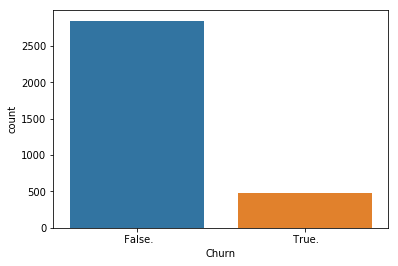

In [99]:
sns.countplot(train_data['Churn'], data = train_data)
#It can be seen here that around 2850 elements are False and around 483 elements are True
#Thus we can say that target imbalance problem exists here


In [100]:
#calculating event rate
483/3333 #14.49%

0.14491449144914492

In [101]:
import random as rd

In [102]:
sample_set = train_data.sample(frac = 0.70, replace = True)

In [103]:
#calculate number of observations in the sample
(3333*70)/100 #2333

2333.1

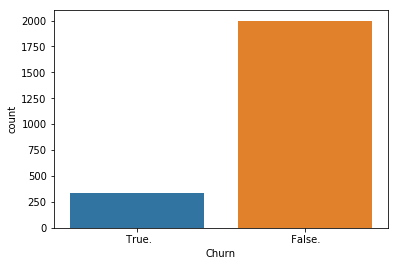

In [104]:
sns.countplot(sample_set['Churn'],data=sample_set)

In [105]:
#Calculate Churn event rate
335/2333
#14.35 % rate of churning on a sample set of 2333 observations

0.143591941705958

In [106]:
#Now from here onwards we are having sample_set as our dataset to apply further processes over it.

In [107]:
#check column names
sample_set.columns

Index(['state', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [108]:
sample_num_data = sample_set._get_numeric_data()
sample_cat_data = sample_set.select_dtypes(include=['object'])
sample_num_data.shape , sample_cat_data.shape

((2333, 15), (2333, 5))

In [109]:
#Built The New Dataset For Further Operations:
new_set = sample_set.sample(frac = 0.70, replace = True)

In [110]:
#Check the dimension
new_set.shape

(1633, 20)

In [111]:
#Check the column names
new_set.columns

Index(['state', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [112]:
#We need only numeric variables so we drop the categorical data:
state_index = new_set.columns.get_loc("state")
state_index
new_set= new_set.drop(new_set.columns[state_index],axis=1)

phone_number_index = new_set.columns.get_loc("phone number")
phone_number_index
new_set=new_set.drop(new_set.columns[phone_number_index],axis=1)

international_plan_index = new_set.columns.get_loc("international plan")
international_plan_index
new_set=new_set.drop(new_set.columns[international_plan_index],axis=1)

voice_mail_plan_index = new_set.columns.get_loc("voice mail plan")
voice_mail_plan_index
new_set=new_set.drop(new_set.columns[voice_mail_plan_index],axis=1)

area_code_index = new_set.columns.get_loc("area code")
area_code_index
new_set= new_set.drop(new_set.columns[area_code_index],axis=1)

number_customer_service_calls_index = new_set.columns.get_loc("number customer service calls")
number_customer_service_calls_index
new_set= new_set.drop(new_set.columns[number_customer_service_calls_index],axis=1)

In [113]:
#After deletion check the new_set dataset again
new_set.columns

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'Churn'],
      dtype='object')

In [114]:
new_num_data = new_set._get_numeric_data()
new_cat_data = new_set.select_dtypes(include=['object'])
new_num_data.shape , new_cat_data.shape

((1633, 13), (1633, 1))

In [115]:
#Extrcting Numeric Column Names
new_cnames=new_num_data.columns
new_cnames

Index(['number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge'],
      dtype='object')

## Check for Missing values column wise 


In [116]:
pd.isna(new_set).sum()
    
#No missing values are available in our sample dataset

number vmail messages    0
total day minutes        0
total day calls          0
total day charge         0
total eve minutes        0
total eve calls          0
total eve charge         0
total night minutes      0
total night calls        0
total night charge       0
total intl minutes       0
total intl calls         0
total intl charge        0
Churn                    0
dtype: int64

# Outlier Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D02086FD0>,
      dtype=object)

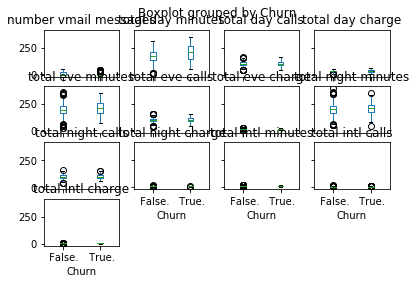

In [117]:
#Visualization Of Outliers
import random
random.seed(1234)
new_set.boxplot(by='Churn', 
                       column=['number vmail messages','total day minutes','total day calls',
                               'total day charge','total eve minutes',
                               'total eve calls','total eve charge','total night minutes','total night calls','total night charge',
                                'total intl minutes','total intl calls','total intl charge'
                              ], 
                       grid=False)

In [118]:
import random
random.seed(1234)
for i in new_cnames:
    print(i,"_______")
    q75, q25 = np.percentile(new_num_data.loc[:,i], [75 ,25])
    iqr = q75 - q25 # inter-quartile range

    minimum = q25 - (iqr*1.5) # Lower fence
    maximum = q75 + (iqr*1.5) # Upper fence
    
    print("Minimum Value : " ,minimum)
    print("Maximum Value : " ,maximum)
    print("")

number vmail messages _______
Minimum Value :  -28.5
Maximum Value :  47.5

total day minutes _______
Minimum Value :  15.750000000000014
Maximum Value :  340.15

total day calls _______
Minimum Value :  45.0
Maximum Value :  157.0

total day charge _______
Minimum Value :  2.6750000000000007
Maximum Value :  57.834999999999994

total eve minutes _______
Minimum Value :  63.70000000000002
Maximum Value :  332.5

total eve calls _______
Minimum Value :  47.5
Maximum Value :  155.5

total eve charge _______
Minimum Value :  5.414999999999999
Maximum Value :  28.255000000000003

total night minutes _______
Minimum Value :  67.89999999999999
Maximum Value :  337.5

total night calls _______
Minimum Value :  48.0
Maximum Value :  152.0

total night charge _______
Minimum Value :  3.0650000000000004
Maximum Value :  15.185

total intl minutes _______
Minimum Value :  3.049999999999998
Maximum Value :  17.85

total intl calls _______
Minimum Value :  -1.5
Maximum Value :  10.5

total intl cha

In [119]:
# included_cols=[6,7,8,9,10,11,12,13,14,15,16,17,18]
# new_num_data = new_num_data.iloc[:,included_cols]
# new_num_data.iloc[:,included_cols] < minimum,:new_num_data[:,included_cols]=np.nan
# new_num_data.iloc[:,included_cols] > maximum,:new_num_data[:,included_cols]=np.nan
#Above code is for looping but that doesn't work...

#Here I am trying with the help of loop but that doesn't work.So i am here use each and every column name.

new_num_data_min=new_num_data.loc[new_num_data['number vmail messages'] < minimum,:'number vmail messages']=np.nan
new_num_data_max=new_num_data.loc[new_num_data['number vmail messages'] > maximum,:'number vmail messages']=np.nan

new_num_data.loc[new_num_data['total day minutes'] < minimum,:'total day minutes']=np.nan
new_num_data.loc[new_num_data['total day minutes'] > maximum,:'total day minutes']=np.nan

new_num_data.loc[new_num_data['total day calls'] < minimum,:'total day calls']=np.nan
new_num_data.loc[new_num_data['total day calls'] > maximum,:'total day calls']=np.nan

new_num_data.loc[new_num_data['total day charge'] < minimum,:'total day charge']=np.nan
new_num_data.loc[new_num_data['total day charge'] > maximum,:'total day charge']=np.nan

new_num_data.loc[new_num_data['total eve minutes'] < minimum,:'total eve minutes']=np.nan
new_num_data.loc[new_num_data['total eve minutes'] > maximum,:'total eve minutes']=np.nan

new_num_data.loc[new_num_data['total eve calls'] < minimum,:'total eve calls']=np.nan
new_num_data.loc[new_num_data['total eve calls'] > maximum,:'total eve calls']=np.nan

new_num_data.loc[new_num_data['total eve charge'] < minimum,:'total eve charge']=np.nan
new_num_data.loc[new_num_data['total eve charge'] > maximum,:'total eve charge']=np.nan

new_num_data.loc[new_num_data['total night minutes'] < minimum,:'total night minutes']=np.nan
new_num_data.loc[new_num_data['total night minutes'] > maximum,:'total night minutes']=np.nan

new_num_data.loc[new_num_data['total night calls'] < minimum,:'total night calls']=np.nan
new_num_data.loc[new_num_data['total night calls'] > maximum,:'total night calls']=np.nan

new_num_data.loc[new_num_data['total night charge'] < minimum,:'total night charge']=np.nan
new_num_data.loc[new_num_data['total night charge'] > maximum,:'total night charge']=np.nan

new_num_data.loc[new_num_data['total intl minutes'] < minimum,:'total intl minutes']=np.nan
new_num_data.loc[new_num_data['total intl minutes'] > maximum,:'total intl minutes']=np.nan

new_num_data.loc[new_num_data['total intl calls'] < minimum,:'total intl calls']=np.nan
new_num_data.loc[new_num_data['total intl calls'] > maximum,:'total intl calls']=np.nan

new_num_data.loc[new_num_data['total intl charge'] < minimum,:'total intl charge']=np.nan
new_num_data.loc[new_num_data['total intl charge'] > maximum,:'total intl charge']=np.nan

In [120]:
#Check the outliers value
new_num_data['number vmail messages'].isnull().sum()
new_num_data['number vmail messages'].isnull().sum()
new_num_data['total day minutes'].isnull().sum()
new_num_data['total day calls'].isnull().sum()
new_num_data['total day charge'].isnull().sum()
new_num_data['total eve minutes'].isnull().sum()
new_num_data['total eve calls'].isnull().sum()
new_num_data['total eve charge'].isnull().sum()
new_num_data['total intl minutes'].isnull().sum()
new_num_data['total intl calls'].isnull().sum()
new_num_data['total intl charge'].isnull().sum()


20

In [121]:
#Calculate Missing Value
missing_val=pd.DataFrame(new_num_data.isnull().sum())
missing_val

,0
number vmail messages,1633
total day minutes,1633
total day calls,1633
total day charge,1633
total eve minutes,1633
total eve calls,1633
total eve charge,1633
total night minutes,1633
total night calls,1633
total night charge,1631


In [ ]:
#Impute With KNN
new_set = pd.DataFrame(KNN(k=1).complete(new_set),columns=new_set.columns)   #Here KNN is not work.There is a problem with the complete attribute.

In [122]:
#Impute With Mean
new_num_data.fillna(new_num_data.mean(), inplace=True)

In [123]:
new_num_data.isnull().sum()

number vmail messages    1633
total day minutes        1633
total day calls          1633
total day charge         1633
total eve minutes        1633
total eve calls          1633
total eve charge         1633
total night minutes      1633
total night calls        1633
total night charge          0
total intl minutes          0
total intl calls            0
total intl charge           0
dtype: int64

In [124]:
#Impute with median

new_num_data.fillna(new_num_data.median(), inplace=True)

In [125]:
new_num_data.isnull().sum()

number vmail messages    1633
total day minutes        1633
total day calls          1633
total day charge         1633
total eve minutes        1633
total eve calls          1633
total eve charge         1633
total night minutes      1633
total night calls        1633
total night charge          0
total intl minutes          0
total intl calls            0
total intl charge           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D026CDCF8>,
      dtype=object)

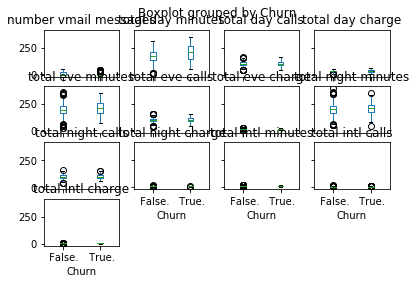

In [126]:
#After Removal Of Outliers The Visualiztion is:
import random
random.seed(1234)
new_set.boxplot(by='Churn', 
                       column=['number vmail messages','total day minutes','total day calls',
                               'total day charge','total eve minutes',
                               'total eve calls','total eve charge','total night minutes','total night calls','total night charge',                                'total intl minutes','total intl calls','total intl charge'
                              ], 
                       grid=False)

# Feature Selection

In [127]:
#Feature Selection is apply on sample_set dataset.
#Feature Selection perform in two ways:
# 1.Correlation Plot  - This is on numerical variables.
# 2.Chi-square Test   - This is on categorical variables.

#Calculate the Numerical Columns Name
import random
random.seed(1234)
sample_num_data_cnames=sample_num_data.columns
sample_num_data_cnames

Index(['area code', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge',
       'number customer service calls'],
      dtype='object')

In [128]:
#Perform Correlation Analysis
corr_analysis=sample_set.loc[:,sample_num_data_cnames]
#corr_analysis

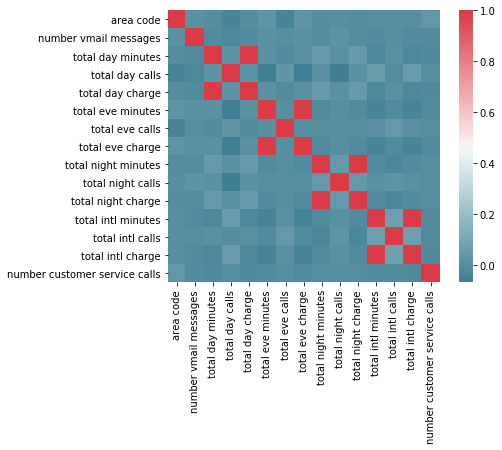

In [129]:
#Set the width & height of the plot
f,ax = plt.subplots(figsize=(7,5))


#Generate Correlation Matrix
corr_matrix=corr_analysis.corr()
corr_matrix

#Plot using seaborn library

sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [131]:
#Chi-square Test is apply on categorical variable
#Calculate Categorical Column Name
import random
random.seed(1234)
sample_cat_data_cnames=['state','phone number','international plan','voice mail plan']
sample_cat_data_cnames

['state', 'phone number', 'international plan', 'voice mail plan']

In [50]:
#Calculate or Display the Chi-Square Values
for i in sample_cat_data_cnames:
    print(i)
    chi2,p,dof,ex=chi2_contingency(pd.crosstab(sample_set['Churn'],sample_set[i]))
    print(p)

state
4.311823941971474e-05
phone number
1.4924319625341054e-24
international plan
8.991944070113332e-37
voice mail plan
1.3236797989117105e-07


# Decision Tree

In [1]:
#Decision Tree
#Convert String into int
import random
random.seed(1234)
sample_set['state'],_ = pd.factorize(sample_set['state'])
sample_set['phone number'],_ = pd.factorize(sample_set['phone number'])
sample_set['international plan'],_ = pd.factorize(sample_set['international plan'])
sample_set['voice mail plan'],_ = pd.factorize(sample_set['voice mail plan'])

sample_set.head()

#Select the predictor feature and target variable
X = sample_set.iloc[:,:-1]
y = sample_set.iloc[:,-1]

# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


NameError: name 'pd' is not defined

In [133]:
#Create a Model for Decision Tree
deci_tree_model=tree.DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

In [134]:
#To Make Prediction On Test Data we first load test dataset
#Load the Test Data
test_data = pd.read_csv("Test_data.csv",encoding='ISO-8859-1')

#Prediction on test dataset
y_pred = deci_tree_model.predict(X_test)

In [135]:
#Because of large dataset,we cannot built a decision tree here.It contain messy data.
#Create Dot file to Visualize Tree                           #http://webgraphviz.com
dotfile=open("pt.dot","w")     
df=tree.export_graphviz(deci_tree_model,out_file=dotfile,feature_names = X.columns)

In [136]:
#Evaluating The Algorithm
#There are ways to display decision tree here.Using crosstab and confusion_matrix & classification report.
CM = pd.crosstab(y_test,y_pred)
CM

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[578  18]
 [ 14  90]]
             precision    recall  f1-score   support

     False.       0.98      0.97      0.97       596
      True.       0.83      0.87      0.85       104

avg / total       0.96      0.95      0.95       700



In [137]:
#Once we get Confusion Matrix then we calculate the term accordingly.
TN = CM.iloc[0,0]                  #True Negative : 578
FN = CM.iloc[1,0]                  #False Negative : 14
TP = CM.iloc[1,1]                  #True Positive : 90
FP = CM.iloc[0,1]                  #False Positive :18
TN,FN,TP,FP

(578, 14, 90, 18)

In [138]:
#Check Accuracy Of the Model using accuracy_score() or using following formula
accuracy_score(y_test,y_pred)*100                   #Accuracy : 95.42%

((TP+TN)*100)/(TN+FN+TP+FP)                         #Accuracy = 95.42%

95.42857142857143

In [2]:
#Calculate False Negative Rate
(FN*100)/(FN+TP)                                    #FNR = 13.46%

NameError: name 'FN' is not defined

In [ ]:
#Decision Tree:
#Accuracy : 95.42%
#FNR = 13.46%

# Random Forest

In [140]:
#Random Forest is apply on sample_set dataset.
#Create a model for Random Forest
RF_model=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
#RF_model

In [141]:
#To Make a Predictions On test dataset
RF_predictions=RF_model.predict(X_test)
#RF_predictions

In [142]:
#Calculate the confusion matrix for performance of the model
CM = pd.crosstab(y_test,RF_predictions)
CM

col_0,False.,True.
Churn,,
False.,592,4
True.,15,89


In [143]:
#Once we get Confusion Matrix then we calculate the term accordingly.
TN = CM.iloc[0,0]                #True Negative :592
FN = CM.iloc[1,0]                #False Negative :15
TP = CM.iloc[1,1]                #True Positive : 89
FP = CM.iloc[0,1]                #False Positive : 4
TN,FN,TP,FP

(592, 15, 89, 4)

In [144]:
#Calculate the Accuracy of the model
((TP+TN)*100)/(TN+FN+TP+FP)      #Accuracy = 97.28%

97.28571428571429

In [145]:
#Calculate False Negative Rate
(FN*100)/(FN+TP)                #FNR = 14.42%

14.423076923076923

In [ ]:
#Random Forest :
#Accuracy = 97.28%
#FNR = 14.42%

# Logistic Regression

In [146]:
#Logistic Regression is apply on sample_set dataset.
#Create A model For Logistic Regression
logisticRegr = LogisticRegression().fit(X_train,y_train)
#logisticRegr

In [147]:
#To Make Predictions On Test Dataset
logit_predictions = logisticRegr.predict(X_test)
#logit_predictions

In [148]:
#Calculate Confusion Matrix for the model
CM = pd.crosstab(y_test,logit_predictions)
CM

col_0,False.,True.
Churn,,
False.,586,10
True.,83,21


In [149]:
#Once we get Confusion Matrix then we calculate the term accordingly.
TN = CM.iloc[0,0]             #True Negative : 586
FN = CM.iloc[1,0]             #False Negative : 83
TP = CM.iloc[1,1]             #True Positive : 21
FP = CM.iloc[0,1]             #False Positive : 10
TN,FN,TP,FP

(586, 83, 21, 10)

In [150]:
#Calculate The Accuracy for the model
((TP+TN)*100)/(TN+FN+TP+FP)      #Accuracy = 86.71%

86.71428571428571

In [151]:
#Calculate The False Negative Rate
(FN*100)/(FN+TP)                #FNR = 79.80%

79.8076923076923

In [1]:
#Logistic Regression :
#Accuracy = 86.71%
#FNR = 79.80%